#### **i. Perkenalan**

Milestones 2

Nama  : Mirza Rendra Sjarief

Batch : CODA-RMT-001

#### **ii. Identifikasi Masalah**



**Defining the Problem Statements
Using SMART framework:**

**Specific:** Melakukan pendeteksian awal untuk pencegahan penyakit diabetes, berdasarkan faktor genetik dan pola hidup.

**Measurable:** Mengurangi 95% resiko pasien terkena diabetes tahap awal.

**Achievable:** Memberi penyuluhan kepada pasien tentang pola makan sehat , pentingnya rutin berolah raga, menghentikan kebiasaan buruk seperti merokok.

**Relevant:** Keberhasilan dalam pendeteksian awal dapat secara signifikan mengurangi kemungkinan pasien terkena diabetes.

**Time-Bound:** Dicapai dalam kurun waktu 6 bulan kedepan.


##### Problem Statements

Tujuan utamanya melakukan pendeteksian awal untuk pencegahan penyakit diabetes, berdasarkan faktor genetik dan pola hidup. Dengan target mengurangi 95% resiko pasien terkena diabetes tahap awal, dalam kurun waktu 6 bulan kedepan.
Memberi penyuluhan kepada pasien tentang pola makan sehat , serta pentingnya rutin berolah raga, menghentikan kebiasaan buruk seperti merokok, dapat secara signifikan mengurangi kemungkinan pasien terkena diabetes lanjutan maupun komplikasi.


**Masalah Utama :** Mengetahui deteksi awal dan klasifikasi pasien dengan penyakit diabetes berdasarkan faktor genetik dan pola hidup.

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail dari inti masalah tersebut. Untuk melakukannya,  kita akan menggunakan metode Key Questions, dengan menjabarkan masalah tersebut menjadi 6 pertanyaan utama, yaitu :

- 1. Apakah pasien dengan riwayat keluarga diabetes (Family History of Diabetes) memiliki risiko lebih tinggi terkena diabetes dibandingkan yang tidak memiliki riwayat keluarga ?

- 2. Siapakah diantara laki - laki dan perempuan yang memiliki angka terkena diabetes tertinggi berasarkan tingkat gula darah HbA1c ?

- 3. Apakah semakin tua umur seseorang semakin besar potensinya terkena diabetes ?

- 4. Apakah terdapat perbedaan HbA1c (sel gula darah) yang signifikan antara pasien yang merokok dan tidak merokok ?

- 5. Apakah pola makan yang buruk dan jarang berolah raga memiliki kaitan dengan hasil diagnosis ?

- 6. Bagaimanakah kolerasi Antara Fasting Blood (FBS) pressure dan HbA1c dalam mendeteksi diabetes ?

apakah siapakah kapankah kenapakah dimanaka bagaimanakah




##### Basic Data Information


**Dataset Description**

Dataset ini terdiri dari 100 + catatan riwayat kesehatan pasien dari berbagai sumber, termasuk rekam medis, survei, dan wawancara. Data dibersihkan dan diproses untuk memastikan keakuratan dan kelengkapannya.

**Context**

Mendeteksi potensi seorang terjangkit diabetes tahap awal, pencegahan diabetes tahap lanjut dan komplikasi kronis, berdasarkan faktor genetik dan pola hidup. Semua yang relevan dengan pencegahan seorang terjangkit maupun terkena diabetes lanjutan atau komplikasi. 

**Content**

Informasi demografis tentang pasien –  Age, Gender, BMI, Blood Pressure ,Family History of Diabetes, Diagnosis, semua riwayat kesehatan pasien yang berelasi dengan pendeteksian diabetes tahap awal dan pencegahan penyakit diabetes tahap lanjut dan komplikasi.

**Columns**

- 1. Age                              - Umur Pasien, in years
- 2. Gender                           - Jenis kelamin pasien, male or female
- 3. BMI                              - Index masa tubuh, in kg/m2
- 4. Blood Pressure                   - Tekanan darah pasien, low, normal, dan high
- 5. FBS                              - Fasting Blood Sugar ( Sampel darah yang diambil setelah berpuasa 8 jam), in mg/dl
- 6. HbA1c                            - Senyawa gula dan protein ( Mencerminkan rata - rata gula darah setelah 2 - 3 bulan terakhir )
- 7. Family History of Diabetes       - Riwayat keturunan keluarga pengidap diabetes
- 8. Smoking                          - Pasien perokok / bukan perokok
- 9. Diet                             - Pola makan pasien  healthy / poor   
- 10. Exercise                        - Pasien rutin berolahraga / tidak
- 11. Diagnosis                       - Pasien positive diabetes / tidak


**Columns Specification:**

BMI :

- Underweight     : Less than 18.5
- Healthy weight  : 18.5 to less than 25
- Overweight      : 25 to less than 30
- Obesity         : 30 or greater

FBS :
- Normal          : Less than 100 mg/dL  
- Prediabetes     : 100–125 mg/dL 
- Diabetes        : 126 mg/dL  or higher 

HbA1c :
- Normal          : Less than 5.7%
- Prediabetes     : 5.7% - 6.4%
- Diabetes        : 6.5% or higher 









#### **iii. Data Loading**

In [290]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Berikut adalah background dataset yang diguanakan dalam penelitian ini  :
- Source  : kaggle.com
- URL     : https://www.kaggle.com/datasets/sujithmandala/easiest-diabetes-classification-dataset
- Author  : Sujith K Mandala
- Licence : Attribution 4.0 International (CC BY 4.0)

Dataset ini diperoleh dalam bentuk bentuk file csv, shingga kita dapat langsung segera convert kedalam bentuk Pandas Data Frame.


In [291]:
#Loading dataset
df = pd.read_csv('/Users/mac/Documents/Hacktiv8/tmp/Diabetes Classification.csv', low_memory=False)
pd.set_option("display.max_columns", None)

df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [292]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


- Code ini menampilkan struktur dataset yang terdiri dari 128 baris atau index dan 11 colom, dan  data types yang terdiri dari float64(1), int64(3), object(7).

In [293]:
df.nunique()


Age                           35
Gender                         2
BMI                           34
Blood Pressure                 3
FBS                           11
HbA1c                         11
Family History of Diabetes     2
Smoking                        2
Diet                           2
Exercise                       2
Diagnosis                      2
dtype: int64

- Code ini memperlihatkan uniqe number pada tiap kolom

In [294]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


- Code ini merupakan gambaran kecil perhitungan statistik dari nilai numerik pada dataset

#### **iii. Data Cleaning**

In [295]:
df.duplicated().sum()

0

- Code ini memastikan tidak ada dupilkat pada data set

In [296]:
df.isnull().sum()


Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

- Code ini memastikan tidak ada missing value / null value pada dataset

In [413]:
hl = df.copy()
hl['Diagnosis'] = hl['Diagnosis'].replace({'Yes':1,'No':0})
hl['Smoking'] = hl['Smoking'].replace({'Yes':1,'No':0})
hl['Diet'] = hl['Diet'].replace({'Healthy':1,'Poor':0})
hl['Family History of Diabetes'] = hl['Family History of Diabetes'].replace({'Yes':1,'No':0})
hl['Blood Pressure'] = hl['Blood Pressure'].replace({'High':2,'Normal':1,'Low':0})
hl['Exercise'] = hl['Exercise'].replace({'Regular':1,'No':0})
hl['Gender'] = hl['Gender'].replace({'Male':1,'Female':0})


hl.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,1,100,5.7,0,0,1,1,0
1,55,0,30,2,120,6.4,1,1,0,0,1
2,65,1,35,2,140,7.1,1,1,0,0,1
3,75,0,40,2,160,7.8,1,1,0,0,1
4,40,1,20,1,80,5.0,0,0,1,1,0


- Code ini membuat hot label dengan mengganti categorical data menjadi numerical sekaligus tipe data object menjadi int64, untuk mempermudah analisis dan melihat kolerasi.

In [323]:
#Compute classify HbA1c
def classify_Age(HbA1c):
    if HbA1c <= 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c <= 6.4:
        return 'Pre Diabetes'
    else:
        return 'Diabetes'
#Making new table 
dc = df.copy()    
dc['HbA1c_Category'] = dc['HbA1c'].apply(classify_Age)

dc.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,HbA1c_Category
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No,Normal
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes,Pre Diabetes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes,Diabetes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes,Diabetes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No,Normal


- code diatas membuat table tambahan yaitu HbA1c_Category ke dalam variable baru yaitu 'dc' mengubah HbA1c menjadi 3 kategori yaitu < 5.7 = normal,< 6.4 = Pra diabetes, dan diatasnya sebagai diabetes.

#### **iV. Analisis dan perhitungang**

### Apakah faktor riwayat keluarga diabetes (Family History of Diabetes) memiliki hubungan yang signifikan dengan hasil diagnosis diabetes ?

- Permasalahan diatas dapat dijawab dengan uji hipotesis dengan metode  chi , dengan mengambil suatu hasil hipotesis dari dua categorical data, yaitu antara data pada column Family History of Diabetes dan Diagnosis.

In [301]:
#Contingency Table
contingency_table = pd.crosstab(df['Family History of Diabetes'],df['Diagnosis'])
contingency_table


Diagnosis,No,Yes
Family History of Diabetes,,
No,49,28
Yes,48,3


- Code ini berfungsi untuk membuat summerize tentang dua categorical data.

In [302]:
# Formulate hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara keturunan diabetes dan diagnosis.")
print("Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.")

#Compute Chi Square Test
res = stats.chi2_contingency(contingency_table)
print("\nP-value:",res.pvalue)

# Conclusion
if res.pvalue < 0.05:
    print("\nReject the null hypothesis. Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.")
else:
    print("Fail to reject the null hypothesis. Tidak ada hubungan antara keturunan diabetes dan diagnosis.")


Hypotheses:
Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara keturunan diabetes dan diagnosis.
Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.

P-value: 0.00019129123169035563

Reject the null hypothesis. Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.


- Dari hasil diatas menyimpulkan bahwa terdapat hubungan yang sangat signifikan secara genetik antara faktor keturunan diabetes dengan hasil diagnosa pasien. Dengan kata lain sangat besar kemungkinan nya seorang yang memiliki keturunan diabetes akan juga menderita diabetes.

#### Apakah semakin tua usia seseorang semakin tinggi kemungkinan terkena diabetes  ?

- Langkah pertama kita harus mengetahui distribusi data dari column Age dan HbA1c, untuk menemukan metode kolerasi yang tepat.

In [304]:
#Computing Normality Test of data Distribution
skewness_Age = df['Age'].skew()
kurtosis_Age = df['Age'].kurtosis()

print(f"Skewness of Age: {skewness_Age:.2f}")
print(f"Kurtosis of Age: {kurtosis_Age:.2f}")

# Determine distribution characteristics
print("\nInterpretation:")
if skewness_Age >  0:
    print("Age data distribution is right-skewed (positively skewed).")
elif skewness_Age <  0:
    print("Age data distribution is left-skewed (negatively skewed).")
else:
    print("Age data distribution is symmetric.")

if kurtosis_Age > 0:
    print("Age is leptokurtic (heavy-tailed).")
elif kurtosis_Age < 0:
    print("Age is platykurtic (light-tailed).")
else:
    print("Age has normal kurtosis (mesokurtic).")

Skewness of Age: 0.12
Kurtosis of Age: -0.96

Interpretation:
Age data distribution is right-skewed (positively skewed).
Age is platykurtic (light-tailed).


<Axes: xlabel='Age'>

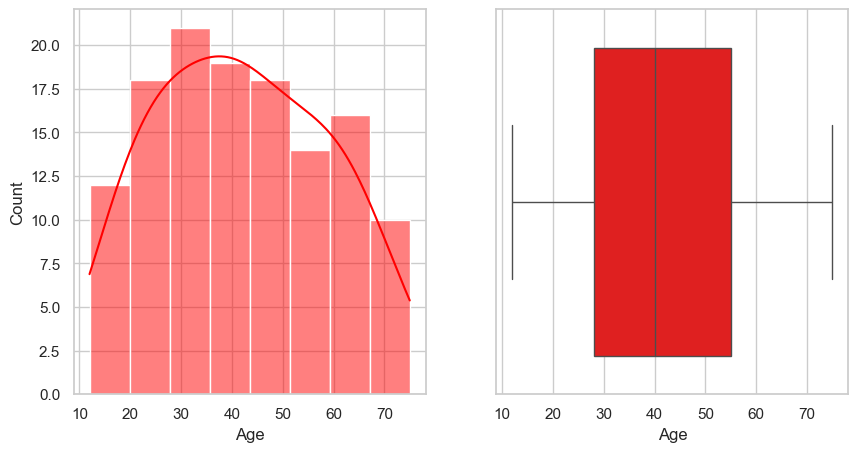

In [350]:
fig, axes = plt.subplots(ncols=2,figsize=(10, 5))

sns.histplot(x=df['Age'],kde=True,ax=axes[0],color='red')
sns.boxplot(x=df['Age'],ax=axes[1],color='red')

- Histogram Age : Bukan bentuk distribusi normal, dengan skewness : 0,12 yang merupakan right - moderately skewed (puncak kemiringan berada sedikit kekiri dari pusat data (40 tahun) dengan frekuensi observasi data yang lebih rendah di sebelah kanan), Kurtosis score -0.96 menunjukan bentuk data platykurtic (light-tailed) dan memiliki puncak yang lebih datar dibandingkan dengan distribusi normal. Ini menunjukkan lebih sedikit outlier atau nilai ekstrim dibandingkan distribusi normal.

- Boxplot Age :
Apabila dilihat berdasarkan IQR dan Q2 / median (40 Tahun), persebaran berdasarkan posisi IQR atau box merah  mengarah sedikit ke arah sebelah kiri, tanpa adanya outlier yang terdeteksi diluar titik minimum maupun maximum data.




- Column Age Menunjukan data distribusi normal. Distribusi data right skewed, dengan kata lain kumpulan data berada di sebelah kiri dari pusat data, dengan data yang menurun menyerupai ekor ke sebelah kanan. Dengan bentuk platykurtic, yaitu memiliki puncak yang lebih datar dibandingkan dengan distribusi normal. Ini menunjukkan lebih sedikit outlier atau nilai ekstrim dibandingkan distribusi normal.

In [305]:
#Computing Normality Test of data Distribution
skewness_HbA1c = df['HbA1c'].skew()
kurtosis_HbA1c = df['HbA1c'].kurtosis()

print(f"\nSkewness of HbA1c : {skewness_HbA1c:.2f}")
print(f"Kurtosis of HbA1c : {kurtosis_HbA1c:.2f}")


# Determine distribution characteristics
print("\nInterpretation:")
if skewness_HbA1c >  0:
    print(" HbA1c data distribution is right-skewed (positively skewed).")
elif skewness_HbA1c <  0:
    print("HbA1c data distribution is left-skewed (negatively skewed).")
else:
    print("HbA1c data distribution is symmetric.")

if kurtosis_HbA1c > 0:
    print("HbA1c is leptokurtic (heavy-tailed).")
elif kurtosis_HbA1c < 0:
    print("HbA1c is platykurtic (light-tailed).")
else:
    print("HbA1c has normal kurtosis (mesokurtic).")




Skewness of HbA1c : 0.43
Kurtosis of HbA1c : -0.95

Interpretation:
 HbA1c data distribution is right-skewed (positively skewed).
HbA1c is platykurtic (light-tailed).


- Column HbA1c juga bukan merupakan data dengan distribusi normal. Memiliki distribusi data right skewed, dengan kata lain kumpulan data berada di sebelah kiri dari pusat data, dengan data yang menurun menyerupai ekor ke sebelah kanan. Dengan bentuk platykurtic, yaitu memiliki puncak yang lebih datar menunjukkan lebih sedikit outlier atau nilai ekstrim.

<Axes: xlabel='HbA1c'>

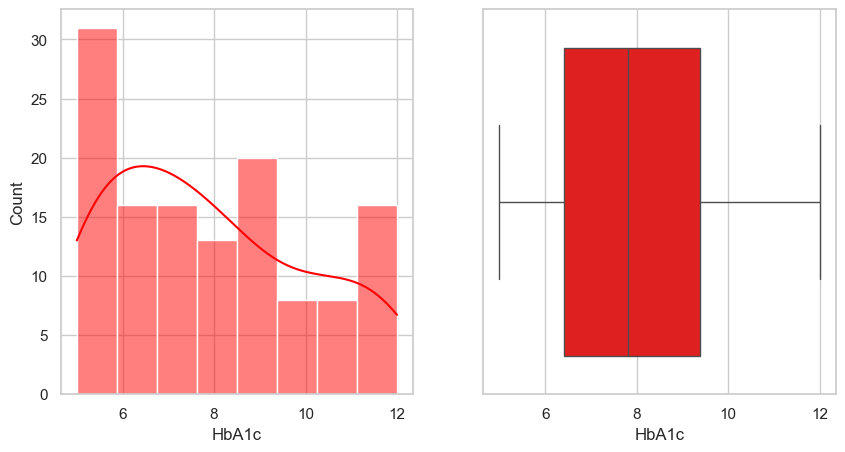

In [351]:
fig, axes = plt.subplots(ncols=2,figsize=(10, 5))

sns.histplot(x=df['HbA1c'],kde=True,ax=axes[0],color='red')
sns.boxplot(x=df['HbA1c'],ax=axes[1],color='red')

- Histogram HbA1c : Bukan merupakan bentuk distribusi normal, dengan sebagian besar titik data berada di sisi kiri dengan puncak data yang berada di paling kiri dari pusat data yaitu 8%, walaupun begitu distribusi ini masuk ke dalam moderately skewed karena skewness berada di angka 0.43. 


- Boxplot HbA1c : Apabila dilihat berdasarkan IQR dan Q2 / median (8%), IQR atau box merah lebih ke arah ujung kiri menunjukan distribusi data tersebar banyak di sebelah kiri, tanpa adanya outlier yang terdeteksi diluar titik minimum maupun maximum data.


- Karena distribusi data yg tidak normal, kolerasi tes yang tepat adalah menggunakan metode spearman karena tidak sensitif terhadap outlier.

In [306]:
#Computing Spearman Correlation Test
corr1 = df['Age'].corr(df['HbA1c'], method='spearman')

print(f"\nPearson Correlation: {corr1:.2f}")




Pearson Correlation: 0.75


- Korelasi 0,75–0,99 termasuk dalam kategori korelasi sangat kuat, terkait permasalahan diatas dapat disimpulkan bahwa usia dan gula darah HbA1c memiliki kolerasi yang positif dimana apabila satu variable meningkat makan variable lainnya juga ikut meningkat dengan kata lain semakin tinggi usia semakin meningkat juga gula darah dalam tubuh yang berpotensi seorang terkena diabetes.


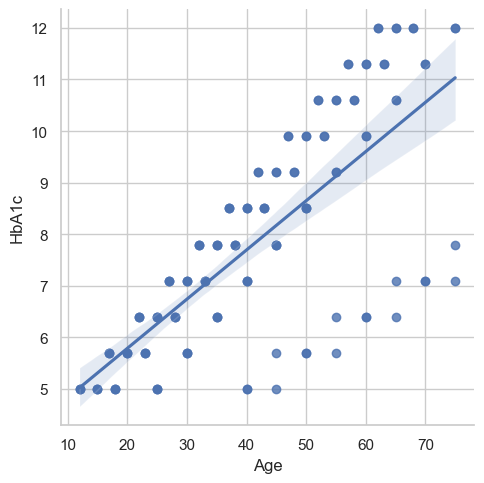

In [359]:
sns.lmplot(data=df,x='Age', y='HbA1c')

- Scatter plot diatas menunjukan kolerasi yang positif antara sel gula dara dan usia. Dimana semakin tinggi usia kadar kadar gula darah meningkat baik secara alami maupun pola hidup manusia.

Siapakah diantara pria dan wanita yang diprediksi lebih banyak terkena diabetes ?

- Untuk menjawab pertanyaan ini kita harus membuat kategori baru pada HbA1c untuk melihat siapa saja diantara pria dan wanita yang mempunyai potensi terkena diabetes terbesar dari sample riwayat kesehatan pasien.

In [ ]:
#Compute classify HbA1c
def classify_Age(HbA1c):
    if HbA1c <= 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c <= 6.4:
        return 'Pre Diabetes'
    else:
        return 'Diabetes'
#Making new table 
dc = df.copy()    
dc['HbA1c_Category'] = dc['HbA1c'].apply(classify_Age)

dc.head()

- code diatas membuat table tambahan yaitu HbA1c_Category ke dalam variable baru yaitu 'dc' mengubah HbA1c menjadi 3 kategori yaitu < 5.7 = normal,< 6.4 = Pra diabetes, dan diatasnya sebagai diabetes.

In [180]:
dc.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,HbA1c_Category
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No,Normal
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes,Pre Diabetes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes,Diabetes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes,Diabetes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No,Normal


In [334]:
dc.groupby('Gender')['HbA1c_Category'].()

AttributeError: 'SeriesGroupBy' object has no attribute 'value_count'

In [ ]:
- Berikut adalah code untuk mengetahui kondisi pasien pria dan wanita dengan kondisi diagnosis berdasarkan sel gula darah HbA1c nya masing - masing

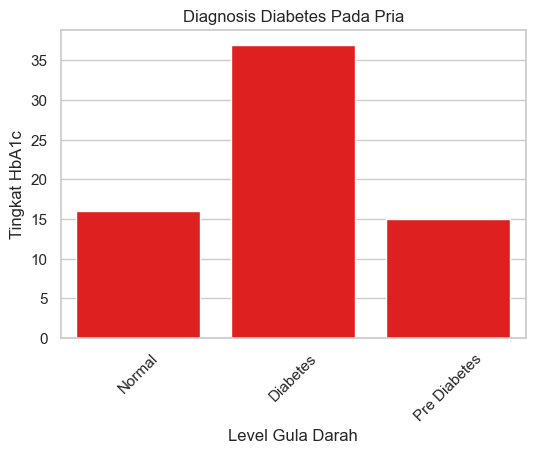

In [325]:

plt.figure(figsize=(6, 4))
sns.countplot(x=dcm['HbA1c_Category'], color='red')
plt.title('Diagnosis Diabetes Pada Pria')
plt.xlabel('Level Gula Darah')
plt.ylabel('Tingkat HbA1c')
plt.xticks(rotation=45)
plt.show()


- Total dari 68 sample pasien pria 37 positif mengidap deiabetes
- Dengan Pre diabetes sebanyak 15 pasien
- Pasien pria kadar gula normal 16 pasien

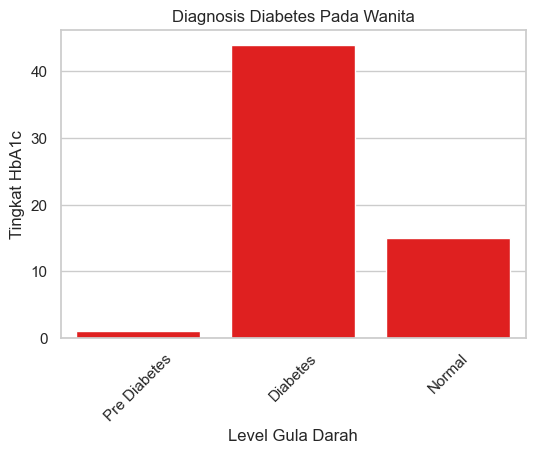

In [324]:

plt.figure(figsize=(6, 4))
sns.countplot(x=dcf['HbA1c_Category'], color='red')
plt.title('Diagnosis Diabetes Pada Wanita')
plt.xlabel('Level Gula Darah')
plt.ylabel('Tingkat HbA1c')
plt.xticks(rotation=45)
plt.show()

- Total dari 60 sample pasien wanita 44 positif mengidap deiabetes
- Dengan Pre diabetes sebanyak 1 pasien
- Pasien wanita dengan kadar gula normal 15 pasien

- Kesimpulan : data menurut sample diatas menggambarkan perempuan dengan status diabetes memiliki jumblah yang lebih banyak dibandingkan pria. Namun apabila ditotal dengan pra diabetes pasien pria memiliki total yang lebih signifikan.

### Apakah terdapat perbedaan HbA1c (sel gula darah) yang signifikan antara pasien yang merokok dan tidak merokok ?

- Untuk menjawab prtanyaan diatas pertama kita harus mengetahui kolerasi antara kedua variable Smoking dan HbA1c, untuk menentukan fungsi yang tepat untuk digunakan pada two sample tes. Dengan menggunakan Spearman test mengingat distribusi data dari HbA1c yang bukan merupakan distribusi normal.

In [411]:
#Computing Spearman Correlation Test
def corr(col):
  tmp = hl.groupby(col)[['Smoking']].mean().reset_index()
  rho, pval = stats.spearmanr(tmp[col],tmp['Smoking'])
#Calculating Result
  print('Spearmanr',rho)
  print('P-value:',pval)
corr('HbA1c')

Spearmanr -0.7186994682200862
P-value: 0.012704641644358416


In [407]:
tmp

,Exercise,Smoking
0,0,1.0
1,1,0.0


- Hasil kolerasi diatas menunjukan kolerasi negatif yang cukup kuat antara kedua variable, untuk itu  kita akan melakukan hipotesis testing menggunakan fungsi yang khusus digunakan untuk variable yang terkait satu sama lain (dependent).

In [215]:
## Answer 8: Two Sample T-Test

# Formulate hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): Tidak ada perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.")
print("Alternative Hypothesis (H1): Terdapat perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.")

# Extract groups
Smoking = hl[hl['Smoking'] == 1]['HbA1c']
No_smoking = hl[hl['Smoking'] == 0]['HbA1c']


# Perform dependent t-test and p-value
t_stat_two_sample, p_value_two_sample =  stats.ttest_rel(Smoking.sample(40), No_smoking.sample(40))#we take 40 sample of each data to make the size the same.

print(f"\nT-statistic: {t_stat_two_sample:.2f}")
print(f"P-value: {p_value_two_sample:.4f}")

# Conclusion
if p_value_two_sample < 0.05:
    print("Reject the null hypothesis. Terdapat perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.")
else:
    print("Fail to reject the null hypothesis.  Tidak ada perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.")


Hypotheses:
Null Hypothesis (H0): Tidak ada perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.
Alternative Hypothesis (H1): Terdapat perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.

T-statistic: -0.88
P-value: 0.3852
Fail to reject the null hypothesis.  Tidak ada perbedaan HbA1c yang signifikan antara Perokok dan Bukan Perokok.


- Dari hasil hipotesis testing diatas menunjukan bahwa tidak ada perbedaan HbA1c (sel gula darah) yang signifikan antara Perokok dan Bukan Perokok. Bisa dikatakan bahwa kebiasaan merokok tidak berpengaruh secara signifikan dalam mendeteksi penyakit diabetes pada pasien.

#### 5. Apakah pola makan dan kebiasaan berolah raga memiliki kaitan dengan hasil diagnosis ?


- Untuk menjawab pertanyaan ini kita harus melakukan test terhadap beberapa data berbentuk kategori, untuk itu pilihan yang tepat adalah menggunakkan chi square test.

In [240]:
#Contingency Table
contingency_table2 = pd.crosstab(df['Diet'],df['Diagnosis'])
contingency_table2


Diagnosis,No,Yes
Diet,,
Healthy,49,0
Poor,48,31


In [ ]:
- melakukan summerize terhadap kolom diet dan diagnosis

In [241]:
# Formulate hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara Olahraga dan diagnosis.")
print("Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara Olahraga dan diagnosis.")

#Compute Chi Square Test
res2 = stats.chi2_contingency(contingency_table2)
print("\nP-value:",res2.pvalue)

# Conclusion
if res2.pvalue < 0.05:
    print("\nReject the null hypothesis. Terdapat hubungan yang signifikan antara Olahraga dan diagnosis.")
else:
    print("Fail to reject the null hypothesis. Tidak ada hubungan antara Olahraga dan diagnosis.")


Hypotheses:
Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara keturunan diabetes dan diagnosis.
Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.

P-value: 1.4006289756531896e-06

Reject the null hypothesis. Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.


- Hasil menunjukan berhasil mereject null hipotesis sehingga menghasilkan hasil terdapat hubungan yang signifikan antara pola makan dan hasil diagnosis. Selanjutnya melakukan chi square test kedua untuk Olahraga dan diagnosis.

In [244]:
#Contingency Table
contingency_table3 = pd.crosstab(df['Exercise'],df['Diagnosis'])
contingency_table3


Diagnosis,No,Yes
Exercise,,
No,48,31
Regular,49,0


- Summerize kedua kolom

In [245]:
# Formulate hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara keturunan diabetes dan diagnosis.")
print("Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.")

#Compute Chi Square Test
res2 = stats.chi2_contingency(contingency_table3)
print("\nP-value:",res2.pvalue)

# Conclusion
if res2.pvalue < 0.05:
    print("\nReject the null hypothesis. Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.")
else:
    print("Fail to reject the null hypothesis. Tidak ada hubungan antara keturunan diabetes dan diagnosis.")


Hypotheses:
Null Hypothesis (H0): Tidak ada hubungan yang signifikan antara keturunan diabetes dan diagnosis.
Alternative Hypothesis (H1): Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.

P-value: 1.4006289756531896e-06

Reject the null hypothesis. Terdapat hubungan yang signifikan antara keturunan diabetes dan diagnosis.


- Hasil hipotesa menunjukan sama - sama menolak null hipotesis sehingga dapat diambil kesimpulan adanya hubungan yang signifikan antara Pola manakan dan olah raga dengan hasil diagnosis diabetes. Secara nyata hal tersebut saling berkesinambungan orang yang berolah raga dapat menurunkan kadar gula  dan pola makan yang baik dengan memakan makanan sehat dan menghindari kadar gula berlebihan dapat membuat kadar gula darah dalam tubuh terkontrol.

- Pertama kita harus melihat tipe distribusi data pada kolom FBS, untuk menentukan jenis metode  kolerasi.

In [331]:
#Computing Normality Test of data Distribution
skewness_HbA1c = df['FBS'].skew()
kurtosis_HbA1c = df['FBS'].kurtosis()

print(f"\nSkewness of FBS : {skewness_HbA1c:.2f}")
print(f"Kurtosis of FBS : {kurtosis_HbA1c:.2f}")


# Determine distribution characteristics
print("\nInterpretation:")
if skewness_HbA1c >  0:
    print(" FBS data distribution is right-skewed (positively skewed).")
elif skewness_HbA1c <  0:
    print("FBS data distribution is left-skewed (negatively skewed).")
else:
    print("FBS data distribution is symmetric.")

if kurtosis_HbA1c > 0:
    print("FBS is leptokurtic (heavy-tailed).")
elif kurtosis_HbA1c < 0:
    print("FBS is platykurtic (light-tailed).")
else:
    print("FBS has normal kurtosis (mesokurtic).")


Skewness of FBS : 0.43
Kurtosis of FBS : -0.95

Interpretation:
 FBS data distribution is right-skewed (positively skewed).
FBS is platykurtic (light-tailed).


- Berdasarkan skew test diatas menunjukan bahwa distribusi data dari FBS adalah right skewed, atau lebih banyak persebaran data di sebelah kiri dari pusat data dengan frekuensi data yang menurun ke sebelah kanan. Memiliki bentuk platykurtic (light-tailed), yaitu bentuk yaitu memiliki puncak yang lebih datar.

<Axes: xlabel='FBS'>

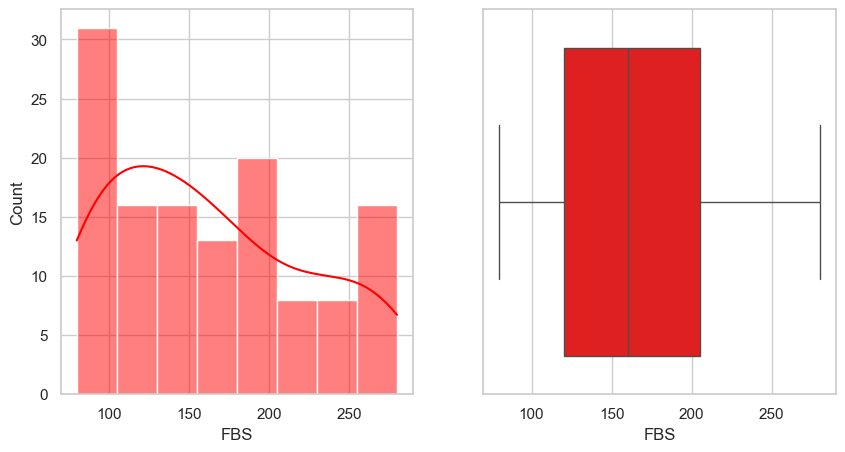

In [352]:
fig, axes = plt.subplots(ncols=2,figsize=(10, 5))

sns.histplot(x=df['FBS'],kde=True,ax=axes[0],color='red')
sns.boxplot(x=df['FBS'],ax=axes[1],color='red')


- Histogram FBS : Bukan merupakan bentuk distribusi normal, dengan sebagian besar titik data berada di sisi kiri dari titik tengah atau median (160 mg/dl), dan data yang banyak terkumpul di angka 1 - 100 mg/dl termasuk modus yang berada di angka 40 mg/dl dengan ekor memanjang ke kanan. Dengan skewness : 0.43 yang menunjukan distribusi data right - moderately skewed. Kurtosis score -0.95 menandakan bentuk data platykurtic (light-tailed) menunjukkan lebih sedikit outlier atau nilai ekstrim hingga ujung kanan data.

- Boxplot Age : 
Apabila dilihat berdasarkan IQR dan Q2 / median (160 mg/dl), persebaran data mengarah ke arah sebelah kiri, ditandakan dari box merah yang berada di sisi kiri, tanpa ada adanya outlier yang terdeteksi diluar titik maximum data.


- Karena memiliki distribusi data yang tidak normal maka kolerasi tes menggunakan metode spearman, yang lebih presisten dalam melakukan tes untuk distribusi data yang tidak normal.


In [333]:
#Computing Spearman Correlation Test
corr1 = df['FBS'].corr(df['HbA1c'], method='spearman')

print(f"\nPearson Correlation: {corr1:.2f}")


Pearson Correlation: 1.00


- Hasil kolerasi menunjukan angka satu yang bermaksud kedua data ini memiliki kolerasi positif yang sangat kuat. Dimana apabila salah satu variabel meningkat maka satunya lagi akan ikut meningkat. Kaitannya dengan kasus adalah keduanya memiliki data keakuratan yang sama dalam mendeteksi diabetes, yang membedakan hanya hasil FBS hanya berlaku untuk waktu singkat karena bersifat sementara. Berbeda dengan HbA1c yang merupakan hemoglobin terglikasi yang dibuat ketika gula dalam tubuh menempel pada sel darah merah. Sehingga dapat bertahan selama 2 - 3 bulan untuk keperluan diagnosis.


<Axes: xlabel='FBS', ylabel='HbA1c'>

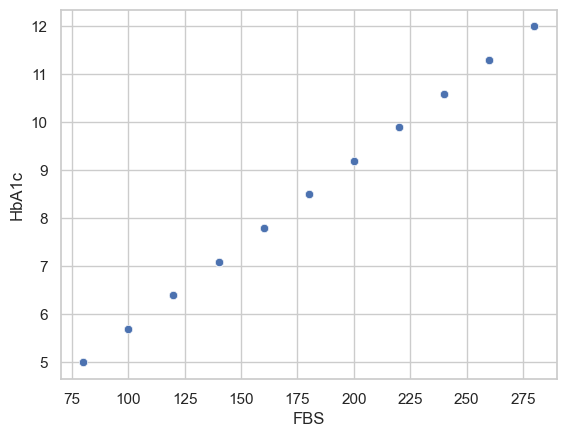

In [373]:
sns.scatterplot(x='FBS',y='HbA1c',data=df,palette='red:red') 

- Scatter plot diatas menunjukan kolerasi positif yang kuat menunjukan peningkatan yang searah terhadap kedua variable, dimana satu variable meningkat akan menunjukan peningkatan yang sama terhadap variable lainnya, yang berarti kadar gula darah pada FBS dan HbA1c menunjukan tingkat yang searah sehingga menunjukan hasil diagnosis valid.

- Lalu bagaimanakah kolerasi terhadap pola hidup manusia, kita menggunakan visualisasi heatmap untuk memastikan pertanyaan tersebut

In [392]:
hl.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,1,100,5.7,0,0,1,1,0
1,55,Female,30,2,120,6.4,1,1,0,0,1
2,65,Male,35,2,140,7.1,1,1,0,0,1
3,75,Female,40,2,160,7.8,1,1,0,0,1
4,40,Male,20,1,80,5.0,0,0,1,1,0


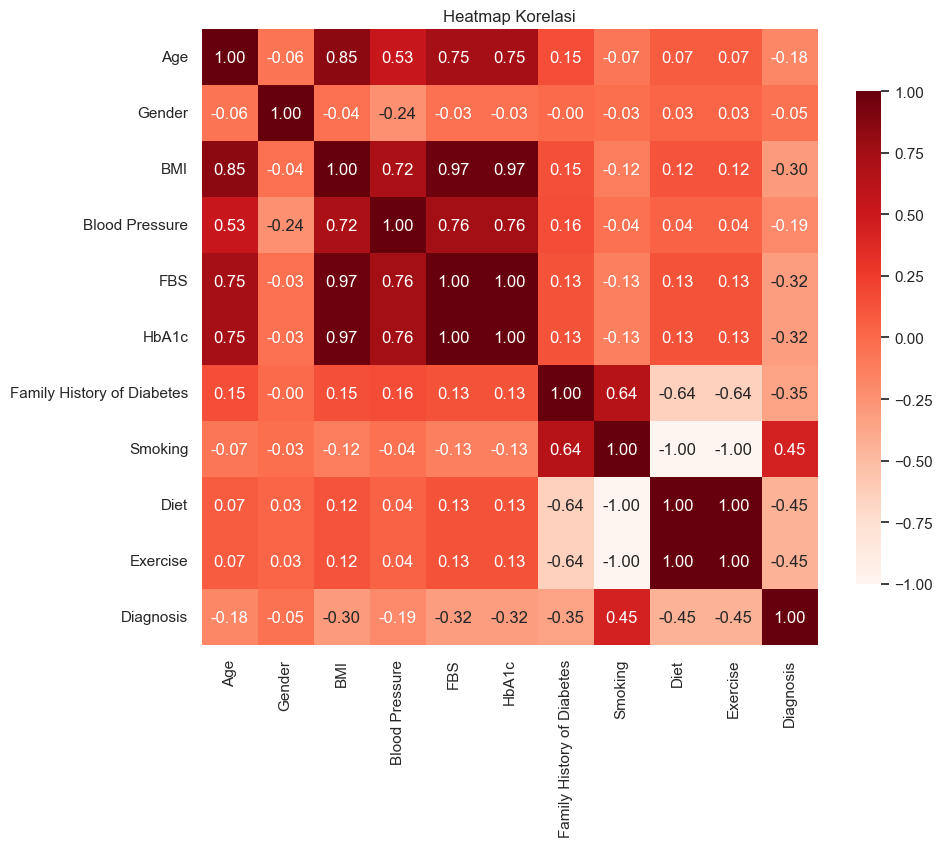

In [414]:
#cols = hl.drop(columns=['Age', 'Gender', 'Blood Pressure','Family History of Diabetes', 'Diagnosis','BMI'])
#Menghitung matriks korelasi

correlation_matrix = hl.corr(method= 'pearson')

#Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Reds', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi')
plt.show()

- Diatas menampilkan kolerasi yang lemah antara FBS HbA1c dan pola hidup, Smoking = 0.13, Exercise = 0.13, Diet = 0.13. Sehingga dapat di definisakan bahwa pola hidup dan gula darah tidak terlalu memiliki impact bagi pasien dalam hal diagnosis maupun peningkatan maupun penurunnya. Namun kolerasinya lebih tinggi terhadap faktor genetik seperti 